In [1]:
import scipy.optimize as opt
import numpy as np
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import SqrtStretch
import matplotlib.pyplot as plt
plt.style.use(astropy_mpl_style)
from fonctions import *

In [2]:
# Opening the images
from PIL import Image

img = fits.getdata('image2.fit')
bias = fits.getdata('bias.fit')
dark = fits.getdata('dark.fit')
flat = fits.getdata('flat.fit')

# saving the images
tmp = img/np.mean(img) * 128
im = Image.fromarray(tmp)
if im.mode != 'RGB':
    im = im.convert('RGB')
im.save("raw.png")

# Averaging the calibration frames
bias = averageFolder('bias')
dark = averageFolder('dark')
flat = averageFolder('flat')

127.99999999999974


/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_7467/301236486.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ca = plt.colorbar()


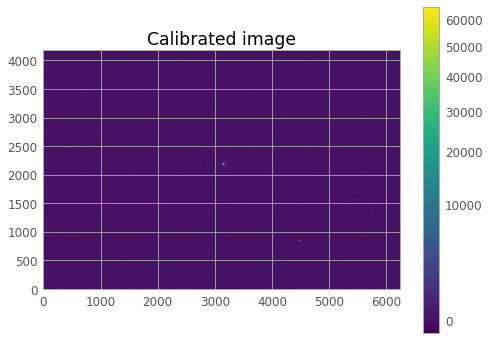

In [3]:
# Image calibrated using the different calibration frames
#from fonctions import *
image_clean = calibrate(img, bias, dark, flat)
#image_clean = image_clean - np.min(image_clean)
#image_clean = image_clean / np.max(image_clean) * (2**16-1)
plt.figure()
plt.title('Calibrated image')
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(image_clean, norm=norm, origin='lower', cmap='viridis', interpolation='none')
ca = plt.colorbar()
plt.show()
tmp = image_clean/np.mean(image_clean) * 128
im = Image.fromarray(tmp)
if im.mode != 'RGB':
    im = im.convert('RGB')
im.save("calibrated.png")

/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_7467/2921287680.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


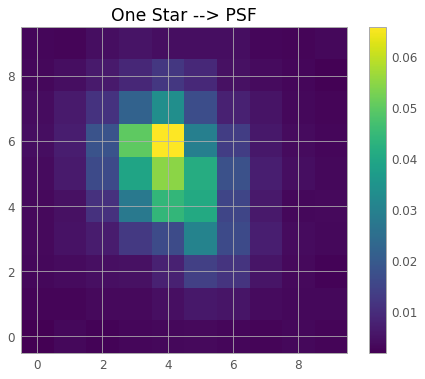

In [4]:
# PSF of one star
#PSF = image_clean[2926-10:2926+10, 2029-10:2029+10]
PSF = image_clean[2628:2638, 822:832]
PSF = PSF / np.sum(PSF) #normalized as a distribution to 1
plt.figure()
plt.title('One Star --> PSF')
plt.imshow(PSF, origin='lower', cmap='viridis', interpolation='none')
plt.colorbar()
plt.show()


/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_7467/315965193.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_7467/315965193.py:16: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xs, ys, interpolated_data.reshape(10, 10), 5, colors='w', label='test')


5.0893777118123085
5.0893777118123085
5.0893777118123085
5.0893777118123085
5.0893777118123085
5.08937778765048
5.08937778765048
5.0893777118123085
5.0893777118123085
38.12613188384826
38.12613189946616
38.1261318635476
38.12613221504347
38.12613233280891
38.12613188384826
38.126131883392674
5.88005787778189
19.617395188142915
19.617395190161883
19.61739518349543
19.617395426648063
19.61739546667883
19.617395188142915
19.617395185451883
11.640598912734824
11.64059891275337
11.640598912680582
11.640599085034237
11.640599086030226
11.640598912734824
11.64059891258559
14.163035361488323
14.16303536163883
14.163035360940057
14.163035562353578
14.163035575547786
14.163035361488323
14.163035346531096
14.555520799456755
14.55552079955466
14.555520798223395
14.555520982124184
14.555521038974197
14.555520799456755
14.55552077998769
14.641595816193353
14.641595816305841
14.641595814942608
14.641596001938366
14.641596054710433
14.641595816193353
14.641595785874788
14.62289285940809
14.62289285951

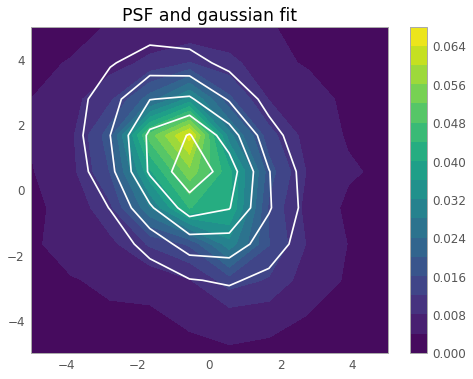

In [5]:
# Fitting of the model on the star
initial_guess = (0, 0, 1, 1, 0.1, np.pi/4)
xs = np.linspace(-5, 5, 10)
ys = np.linspace(-5, 5, 10)
xy = np.meshgrid(xs, ys)
xy = np.ravel(xy)
params, covar = opt.curve_fit(gaussian2D, xy, np.ravel(PSF), p0=initial_guess)
print(params)
interpolated_data = gaussian2D(xy, params[0], params[1],
                               params[2], params[3], params[4], params[5])

plt.figure()
plt.title('PSF and gaussian fit')
plt.contourf(xs, ys, PSF, 20, origin='lower', cmap='viridis')
plt.colorbar()
plt.contour(xs, ys, interpolated_data.reshape(10, 10), 5, colors='w', label='test')


In [10]:
print('FWHH and angle: {:.2f}, {:.2f}, {:.2f}'.format(params[2], params[3], params[-1]*180/np.pi))

FWHH and angle: 2.18, 1.37, 59.96
